In [1]:
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappush, heappop
import time

startInstantTime = time.time()

In [2]:
def printColouredText(text, foregroundColor = (0, 0, 0), backgroundColor = (255, 255, 255)):
    return "\033[48;2;{};{};{}m\033[38;2;{};{};{}m{}\033[38;2;0;0;0m\033[48;2;255;255;255m".format(backgroundColor[0], backgroundColor[1], backgroundColor[2], foregroundColor[0], foregroundColor[1], foregroundColor[2], text)

#Funcion hash para mapear de una coordenada (x, y) de una malla de puntos equidistantes a un numero natural
def hashCoordenadaANumero(valorCoordenadaX, valorCoordenadaY, numeroVerticesAlto, numeroVerticesAncho):
    return valorCoordenadaX + valorCoordenadaY * numeroVerticesAlto

#Funcion hash para mapear de un numero natural a una coordenada (x, y) de una malla de puntos equidistantes
def hashNumeroACoordenada(numeroIdentificador, numeroVerticesAlto, numeroVerticesAncho):
    valorCoordenadaX = numeroIdentificador % numeroVerticesAncho
    valorCoordenadaY = int(numeroIdentificador / numeroVerticesAncho)
    return valorCoordenadaX, valorCoordenadaY

def crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo):
    if nodoOrigen not in grafo:
        grafo[nodoOrigen] = {}
    (grafo[nodoOrigen])[nodoDestino] = costo
    if nodoDestino not in grafo:
        grafo[nodoDestino] = {}
    (grafo[nodoDestino])[nodoOrigen] = costo

def extraerInformacionGrafo(nombreArchivo):
    grafo = {}
    informacionAristasGrafo = {}
    numeroVerticesAlto = None
    numeroVerticesAncho = None
    
    #Lectura linea por linea del archivo, en la primera linea se tiene el numero de vertices de alto del grafo de malla, en la segunda linea se tiene el numero de vertices de ancho del grafo de malla, en las demas lineas se tienen separados por espacios los datos de cada arista (Nodo origen, nodo destino, costo y color asignado)
    inputStream = open(nombreArchivo, "r")
    listaNodosEncontrados = []
    lineasTextoArchivo = inputStream.readlines()
    for indice in range(len(lineasTextoArchivo)):
        if indice == 0:
            numeroVerticesAlto = int(lineasTextoArchivo[indice].strip())
        elif indice == 1:
            numeroVerticesAncho = int(lineasTextoArchivo[indice].strip())
        else:
            datosArista = lineasTextoArchivo[indice].strip().split(" ")
            nodoOrigen = int(datosArista[0])
            nodoDestino = int(datosArista[1])
            costo = float(datosArista[2])
            colorArista = datosArista[3]
            crearAristaGrafoNoDirigido(grafo, nodoOrigen, nodoDestino, costo)
            informacionAristasGrafo[(nodoOrigen, nodoDestino)] = {"costo": costo, "color": colorArista}

            if nodoOrigen not in listaNodosEncontrados:
                listaNodosEncontrados.append(nodoOrigen)
            if nodoDestino not in listaNodosEncontrados:
                listaNodosEncontrados.append(nodoDestino)
    numeroNodosEncontrados = len(listaNodosEncontrados)
    numeroAristasEncontradas = len(list(informacionAristasGrafo.keys()))
    inputStream.close()
    return grafo, informacionAristasGrafo, numeroNodosEncontrados, numeroAristasEncontradas, numeroVerticesAlto, numeroVerticesAncho

def actualizarHeap(heap, d, v):
    for indice in range(len(heap)):
        if heap[indice][1] == v:
            heap[indice][0] = d
            ajustarHeapAHeapMinimal(heap, indice) #Esta instruccion se puede reemplazar por heap = heapify(heap) pero es ineficiente
            break

def ajustarHeapAHeapMinimal(heap, indice):
    if indice == 0:
        return
    indicePredecesorInmediato = int(indice / 2)
    if indicePredecesorInmediato >= 0 and heap[indicePredecesorInmediato][0] > heap[indice][0]:
        heap[indice], heap[indicePredecesorInmediato] = heap[indicePredecesorInmediato], heap[indice]
        ajustarHeapAHeapMinimal(heap, indicePredecesorInmediato)

def algoritmoDijkstra(grafo, nodoOrigen):
    diccionarioDistanciasDesdeNodoOrigen = {}
    for nodoEntrada in grafo:
        diccionarioDistanciasDesdeNodoOrigen[nodoEntrada] = float('inf')
    diccionarioDistanciasDesdeNodoOrigen[nodoOrigen] = 0
    
    diccionarioNodosPredecesores = {}
    heapMinimalDistanciasYNodos = []
    for nodoEntrada in grafo:
        item = []
        item.append(diccionarioDistanciasDesdeNodoOrigen[nodoEntrada])
        item.append(nodoEntrada)
        heappush(heapMinimalDistanciasYNodos, item)
    
    #S = []
    while heapMinimalDistanciasYNodos:
        u = heappop(heapMinimalDistanciasYNodos)[1]
        #S.append(u)
        for v in grafo[u]:
            distanciaTentativa = diccionarioDistanciasDesdeNodoOrigen[u] + grafo[u][v]
            if distanciaTentativa < diccionarioDistanciasDesdeNodoOrigen[v]:
                diccionarioNodosPredecesores[v] = u
                diccionarioDistanciasDesdeNodoOrigen[v] = distanciaTentativa
                actualizarHeap(heapMinimalDistanciasYNodos, diccionarioDistanciasDesdeNodoOrigen[v], v)
    return diccionarioDistanciasDesdeNodoOrigen, diccionarioNodosPredecesores

def construirCaminoMasCorto(grafo, nodoOrigen, nodoDestino):
    diccionarioDistanciasDesdeNodoOrigen, diccionarioNodosPredecesores = algoritmoDijkstra(grafo, nodoOrigen)
    caminoEncontrado = []
    while True:
        caminoEncontrado.append(nodoDestino)
        if nodoDestino == nodoOrigen:
            break
        nodoDestino = diccionarioNodosPredecesores[nodoDestino]
    caminoEncontrado.reverse()
    return caminoEncontrado

def crearTextoDescriptorSucesionElementos(listaElementos, separador = " "):
    textoSucesionElementosLista = ""
    for indice in range(len(listaElementos) - 1):
        textoSucesionElementosLista += str(listaElementos[indice]) + separador
    textoSucesionElementosLista += str(listaElementos[indice])
    return textoSucesionElementosLista

def calcularCostoCaminoEnGrafo(grafo, listaNodosCamino):
    costoCamino = 0.0
    for indice in range(len(listaNodosCamino) - 1):
        costoCamino += grafo[listaNodosCamino[indice]][listaNodosCamino[indice + 1]]
    return costoCamino

def obtenerListasCoordendasGrafo(grafo, numeroVerticesAlto, numeroVerticesAncho):
    listaValoresCoordenadaX = []
    listaValoresCoordenadaY = []
    listaNodosVisitadosGrafo = []
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen not in listaNodosVisitadosGrafo:
                listaNodosVisitadosGrafo.append(nodoOrigen)
                valorCoordenadaXNodoActual, valorCoordenadaYNodoActual = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                listaValoresCoordenadaX.append(valorCoordenadaXNodoActual)
                listaValoresCoordenadaY.append(valorCoordenadaYNodoActual)
            if nodoDestino not in listaNodosVisitadosGrafo:
                listaNodosVisitadosGrafo.append(nodoDestino)
                valorCoordenadaXNodoActual, valorCoordenadaYNodoActual = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                listaValoresCoordenadaX.append(valorCoordenadaXNodoActual)
                listaValoresCoordenadaY.append(valorCoordenadaYNodoActual)
    return listaValoresCoordenadaX, listaValoresCoordenadaY

def obtenerListasCoordenadasCamino(listaNodosCamino, numeroVerticesAlto, numeroVerticesAncho):
    listaPuntosCamino = []
    listaValoresCoordenadasEjeX = []
    listaValoresCoordenadasEjeY = []
    for nodoActual in listaNodosCamino:
        coordenadaXNodoActual, coordenadaYNodoActual = hashNumeroACoordenada(nodoActual, numeroVerticesAlto, numeroVerticesAncho)
        listaValoresCoordenadasEjeX.append(coordenadaXNodoActual)
        listaValoresCoordenadasEjeY.append(coordenadaYNodoActual)
        listaPuntosCamino.append((coordenadaXNodoActual, coordenadaYNodoActual))
    return listaPuntosCamino, listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY

def dibujarAristasGrafoPlanoCartesiano(grafo, informacionAristasGrafo, transparencia = 0.9):
    for nodoOrigen in grafo:
        for nodoDestino in grafo[nodoOrigen]:
            if nodoOrigen < nodoDestino:
                valorCoordenadaXNodoOrigen, valorCoordenadaYNodoOrigen = hashNumeroACoordenada(nodoOrigen, numeroVerticesAlto, numeroVerticesAncho)
                valorCoordenadaXNodoDestino, valorCoordenadaYNodoDestino = hashNumeroACoordenada(nodoDestino, numeroVerticesAlto, numeroVerticesAncho)
                colorArista = informacionAristasGrafo[(nodoOrigen, nodoDestino)]["color"]
                plt.plot([valorCoordenadaXNodoOrigen, valorCoordenadaXNodoDestino], [valorCoordenadaYNodoOrigen, valorCoordenadaYNodoDestino], '', c = colorArista, alpha = transparencia)

In [3]:
#Se propone un camino en el grafo que inicia en un nodo de origen y termina en un nodo de destino dados, a traves de una exploracion del grafo de forma aleatoria
def crearRuta(G, start, end, listaNodosAExcluir = []):
    camino = [start]
    noAccesibles = listaNodosAExcluir
    ubicacionActual = start
    while ubicacionActual != end:
        #Se quiere saber si todos los vecinos al nodo actual son inaccesibles, es decir, si todos los vecinos estan en la ruta propuesta o en la lista de nodos inaccesibles
        todosLosVecinosSonInaccesibles = True
        for vecino in G[ubicacionActual]:
            if vecino not in camino and vecino not in noAccesibles:
                todosLosVecinosSonInaccesibles = False
                break
        
        #Si todos los vecinos al nodo actual son inaccesibles, se elimina el nodo actual de la ruta, se anade el nodo actual a la lista de nodos inaccesibles y se considera el ultimo nodo de la ruta como nodo actual para continuar formando la ruta
        if todosLosVecinosSonInaccesibles:
            camino = camino[0:len(camino) - 1]
            noAccesibles.append(ubicacionActual)
            ubicacionActual = camino[len(camino) - 1]
            continue

        #En caso de que haya un nodo vecino que se pueda escoger para formar la ruta se esocge al azar un nodo para agregarlo a la ruta de tal forma que no este en la ruta y no este en la lista de nodos inaccesibles y luego considerar como nodo actual al nodo que se agrego
        numero = np.random.randint(len(G[ubicacionActual]))
        temporal = 0
        nuevaUbicacion = None
        for vecino in G[ubicacionActual]:
            if temporal == numero:
                nuevaUbicacion = vecino
                break
            else:
                temporal += 1
        
        while nuevaUbicacion in camino or nuevaUbicacion in noAccesibles:
            numero = np.random.randint(len(G[ubicacionActual]))
            temporal = 0
            nuevaUbicacion = None
            for vecino in G[ubicacionActual]:
                if temporal == numero:
                    nuevaUbicacion = vecino
                    break
                else:
                    temporal += 1
        camino.append(nuevaUbicacion)
        ubicacionActual = nuevaUbicacion
    return camino

#Se propone como forma de modificar un camino propuesto: Se considera el subcamino para a y c como un camino valido y se propone un nuevo camino para c y b donde c es un nodo intermedio de la ruta propuesta tal que c != a y c != b
def crearRutaModificada(G, ruta):
    puntoCorte = np.random.randint(len(ruta) - 2)
    rutaModificada = []
    for indice in range(puntoCorte + 1):
        rutaModificada.append(ruta[indice])
    subrutaFinal = crearRuta(G, ruta[puntoCorte + 1], ruta[len(ruta) - 1], listaNodosAExcluir = ruta[0:(puntoCorte + 1)])
    for nodo in subrutaFinal:
        rutaModificada.append(nodo)
    return rutaModificada

#A partir del templado simulado, se calcula la probabilidad de aceptacion de una nueva solucion segun su energia
def calcularProbabilidadAceptacion(energiaSolucionActual, energiaNuevaSolucion, temperatura):
    if energiaNuevaSolucion < energiaSolucionActual:
        return 1.0
    return np.exp((energiaSolucionActual - energiaNuevaSolucion) / temperatura)

In [4]:
#Parametros de ejecucion del programa
nombreArchivo = "Datos del Grafo.txt"
coordenadaXPuntoInicial = 1
coordenadaYPuntoInicial = 2
coordenadaXPuntoFinal = 22
coordenadaYPuntoFinal = 23
temperaturaInicial = 5000.0
temperaturaFinal = 0.001
tasaEnfriamiento = 0.99
tiempoPausaAnimacion = 0.001

In [5]:
grafo, informacionAristasGrafo, numeroNodosEncontrados, numeroAristasEncontradas, numeroVerticesAlto, numeroVerticesAncho = extraerInformacionGrafo(nombreArchivo)

colorTextoVerde = (35, 155, 86)
colorTextoRojo = (176, 58, 46)
print("Se ha extraído la información del grafo del archivo", printColouredText(nombreArchivo, colorTextoVerde))
print("El grafo contiene", printColouredText(str(numeroNodosEncontrados) + " nodos", colorTextoVerde), "y", printColouredText(str(numeroAristasEncontradas) + " aristas", colorTextoVerde))
print("Se va a buscar una solución al camino más corto entre los puntos", printColouredText(str((coordenadaXPuntoInicial, coordenadaYPuntoInicial)), colorTextoRojo), "y", printColouredText(str((coordenadaXPuntoFinal, coordenadaYPuntoFinal)), colorTextoRojo))

Se ha extraído la información del grafo del archivo Datos del Grafo.txt
El grafo contiene 625 nodos y 1200 aristas
Se va a buscar una solución al camino más corto entre los puntos (1, 2) y (22, 23)


In [6]:
nodoOrigen = hashCoordenadaANumero(coordenadaXPuntoInicial, coordenadaYPuntoInicial, numeroVerticesAlto, numeroVerticesAncho)
nodoDestino = hashCoordenadaANumero(coordenadaXPuntoFinal, coordenadaYPuntoFinal, numeroVerticesAlto, numeroVerticesAncho)

listaNodosCaminoMasCortoOrigenADestino = construirCaminoMasCorto(grafo, nodoOrigen, nodoDestino)
listaPuntosCaminoMasCortoOrigenADestino, listaValoresCoordenadasEjeXCaminoMasCortoOrigenADestino, listaValoresCoordenadasEjeYCaminoMasCortoOrigenADestino = obtenerListasCoordenadasCamino(listaNodosCaminoMasCortoOrigenADestino, numeroVerticesAlto, numeroVerticesAncho)
textoCaminoMasCortoOrigenADestino = crearTextoDescriptorSucesionElementos(listaPuntosCaminoMasCortoOrigenADestino, separador = " -> ")
costoCaminoMasCortoOrigenADestino = calcularCostoCaminoEnGrafo(grafo, listaNodosCaminoMasCortoOrigenADestino)
print("El camino más corto entre los puntos", printColouredText(str((coordenadaXPuntoInicial, coordenadaYPuntoInicial)), colorTextoVerde), "y", printColouredText(str((coordenadaXPuntoFinal, coordenadaYPuntoFinal)), colorTextoVerde), "es:")
print(printColouredText(textoCaminoMasCortoOrigenADestino, colorTextoRojo))
print("El camino más corto entre los puntos", printColouredText(str((coordenadaXPuntoInicial, coordenadaYPuntoInicial)), colorTextoVerde), "y", printColouredText(str((coordenadaXPuntoFinal, coordenadaYPuntoFinal)), colorTextoVerde), "tiene una distancia total de", printColouredText(str(costoCaminoMasCortoOrigenADestino), colorTextoVerde), "y pasa por", printColouredText(str(len(listaNodosCaminoMasCortoOrigenADestino)), colorTextoVerde), "nodos")

El camino más corto entre los puntos (1, 2) y (22, 23) es:
(1, 2) -> (1, 3) -> (2, 3) -> (2, 4) -> (3, 4) -> (4, 4) -> (4, 5) -> (5, 5) -> (6, 5) -> (6, 6) -> (7, 6) -> (7, 7) -> (7, 8) -> (7, 9) -> (7, 10) -> (8, 10) -> (9, 10) -> (9, 11) -> (9, 12) -> (9, 13) -> (9, 14) -> (10, 14) -> (11, 14) -> (11, 15) -> (12, 15) -> (13, 15) -> (14, 15) -> (14, 16) -> (14, 17) -> (14, 18) -> (14, 19) -> (15, 19) -> (15, 20) -> (16, 20) -> (17, 20) -> (17, 21) -> (18, 21) -> (19, 21) -> (19, 22) -> (20, 22) -> (20, 23) -> (21, 23) -> (21, 23)
El camino más corto entre los puntos (1, 2) y (22, 23) tiene una distancia total de 51.260000000000005 y pasa por 43 nodos


In [7]:
numeroIteraciones = int(np.ceil((np.log10(temperaturaFinal) - np.log10(temperaturaInicial)) / np.log10(tasaEnfriamiento)))
listaNodosCaminoPropuestoOrigenADestino = crearRuta(grafo, nodoOrigen, nodoDestino)
listaPuntosCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeXCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYCaminoPropuestoOrigenADestino = obtenerListasCoordenadasCamino(listaNodosCaminoPropuestoOrigenADestino, numeroVerticesAlto, numeroVerticesAncho)
costoCaminoPropuestoOrigenADestino = calcularCostoCaminoEnGrafo(grafo, listaNodosCaminoPropuestoOrigenADestino)
print("La animación termina después de", printColouredText(str(numeroIteraciones), colorTextoVerde), "iteraciones")
print("El camino entre los puntos", printColouredText(str((coordenadaXPuntoInicial, coordenadaYPuntoInicial)), colorTextoVerde), "y", printColouredText(str((coordenadaXPuntoFinal, coordenadaYPuntoFinal)), colorTextoVerde), "propuesto inicialmente tiene una distancia total de", printColouredText(str(costoCaminoPropuestoOrigenADestino), colorTextoVerde), "y pasa por", printColouredText(str(len(listaNodosCaminoPropuestoOrigenADestino)), colorTextoVerde), "nodos")

La animación termina después de 1535 iteraciones
El camino entre los puntos (1, 2) y (22, 23) propuesto inicialmente tiene una distancia total de 364.26 y pasa por 245 nodos


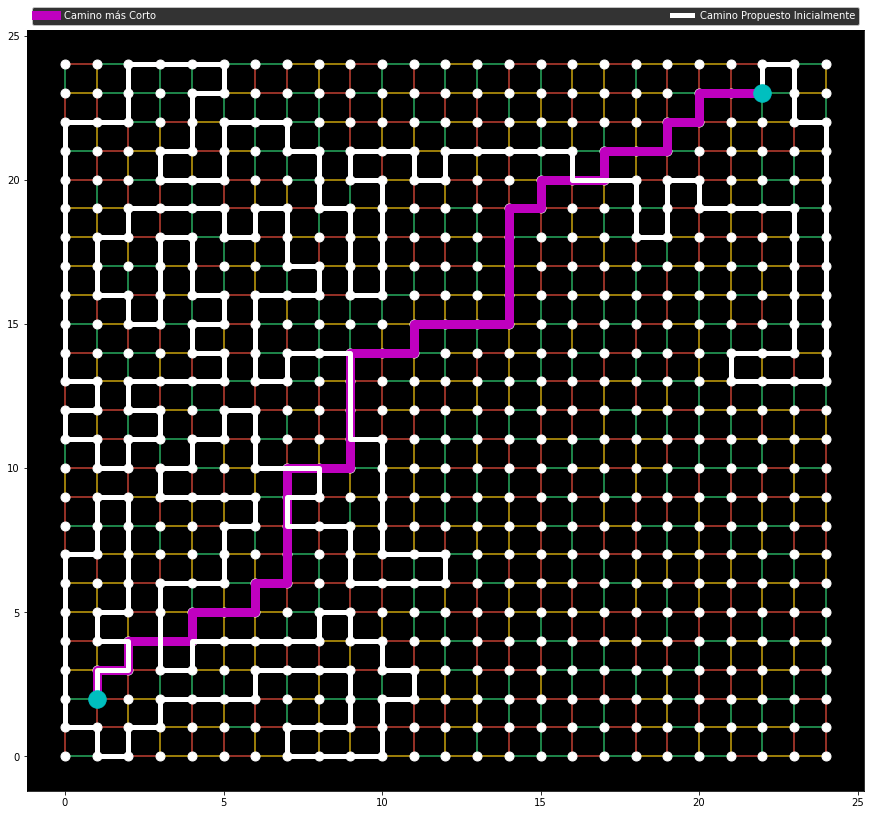

In [8]:
listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY = obtenerListasCoordendasGrafo(grafo, numeroVerticesAlto, numeroVerticesAncho)

plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (15, 14))
dibujarAristasGrafoPlanoCartesiano(grafo, informacionAristasGrafo, transparencia = 0.85)
plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 18)
plt.plot(listaValoresCoordenadasEjeXCaminoMasCortoOrigenADestino, listaValoresCoordenadasEjeYCaminoMasCortoOrigenADestino, 'm-', label = 'Camino más Corto', linewidth = 9)
plt.plot(listaValoresCoordenadasEjeXCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYCaminoPropuestoOrigenADestino, 'w-', label = 'Camino Propuesto Inicialmente', linewidth = 5)
plt.plot([coordenadaXPuntoInicial, coordenadaXPuntoFinal], [coordenadaYPuntoInicial, coordenadaYPuntoFinal], 'c.', markersize = 35)
plt.legend(bbox_to_anchor = (0.0, 1.0, 1.0, 0.0), labelcolor = 'w', loc = 3, ncol = 2, mode = 'expand', borderaxespad = 0.5)
plt.show()

In [9]:
%matplotlib

listaValoresCoordenadasEjeXMejorCaminoPropuestoOrigenADestino = []
listaValoresCoordenadasEjeYMejorCaminoPropuestoOrigenADestino = []
listaValoresCoordenadasEjeXCaminoPropuestoOrigenADestino = []
listaValoresCoordenadasEjeYCaminoPropuestoOrigenADestino = []
textoMejorCaminoPropuestoOrigenADestino = ""

temperaturaActual = temperaturaInicial
listaNodosMejorCaminoPropuestoOrigenADestino = listaNodosCaminoPropuestoOrigenADestino
costoMejorCaminoPropuestoOrigenADestino = calcularCostoCaminoEnGrafo(grafo, listaNodosMejorCaminoPropuestoOrigenADestino)
listaValoresEnergiaSolucionPropuesta = []
listaValoresEnergiaMejorSolucionPropuesta = []
plt.ion()
plt.show()
while temperaturaActual > temperaturaFinal:
    plt.clf()
    
    #Se actualiza el camino propuesto y se calcula la energia de las soluciones (en este caso la energia es el costo del camino)
    listaNodosCaminoModificadoOrigenADestino = crearRutaModificada(grafo, listaNodosCaminoPropuestoOrigenADestino)
    costoCaminoPropuestoOrigenADestino = calcularCostoCaminoEnGrafo(grafo, listaNodosCaminoPropuestoOrigenADestino)
    costoCaminoModificadoOrigenADestino = calcularCostoCaminoEnGrafo(grafo, listaNodosCaminoModificadoOrigenADestino)
    
    #Se decide si se acepta el camino modificado o no como posible mejora al camino propuesto
    probabilidadAceptacionCaminoModificadoOrigenADestino = calcularProbabilidadAceptacion(costoCaminoPropuestoOrigenADestino, costoCaminoModificadoOrigenADestino, temperaturaActual)
    if probabilidadAceptacionCaminoModificadoOrigenADestino > np.random.rand():
        listaNodosCaminoPropuestoOrigenADestino = listaNodosCaminoModificadoOrigenADestino
        costoCaminoPropuestoOrigenADestino = calcularCostoCaminoEnGrafo(grafo, listaNodosCaminoPropuestoOrigenADestino)
    
    #Se verifica si se actualiza el camino propuesto como el mejor camino encontrado
    if costoCaminoPropuestoOrigenADestino < costoMejorCaminoPropuestoOrigenADestino:
        listaNodosMejorCaminoPropuestoOrigenADestino = listaNodosCaminoPropuestoOrigenADestino
    costoMejorCaminoPropuestoOrigenADestino = calcularCostoCaminoEnGrafo(grafo, listaNodosMejorCaminoPropuestoOrigenADestino)
    
    temperaturaActual *= tasaEnfriamiento #Se enfria el sistema
    
    listaValoresEnergiaSolucionPropuesta.append(costoCaminoPropuestoOrigenADestino)
    listaValoresEnergiaMejorSolucionPropuesta.append(costoMejorCaminoPropuestoOrigenADestino)
    listaPuntosMejorCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeXMejorCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYMejorCaminoPropuestoOrigenADestino = obtenerListasCoordenadasCamino(listaNodosMejorCaminoPropuestoOrigenADestino, numeroVerticesAlto, numeroVerticesAncho)
    listaPuntosCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeXCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYCaminoPropuestoOrigenADestino = obtenerListasCoordenadasCamino(listaNodosCaminoPropuestoOrigenADestino, numeroVerticesAlto, numeroVerticesAncho)
    textoMejorCaminoPropuestoOrigenADestino = crearTextoDescriptorSucesionElementos(listaPuntosMejorCaminoPropuestoOrigenADestino, separador = " -> ")
    
    plt.subplot(121)
    dibujarAristasGrafoPlanoCartesiano(grafo, informacionAristasGrafo, transparencia = 0.85)
    plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 12)
    plt.plot(listaValoresCoordenadasEjeXCaminoMasCortoOrigenADestino, listaValoresCoordenadasEjeYCaminoMasCortoOrigenADestino, 'm-', label = 'Camino más Corto', linewidth = 9)
    plt.plot(listaValoresCoordenadasEjeXMejorCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYMejorCaminoPropuestoOrigenADestino, 'w-', label = 'Mejor Camino Propuesto', linewidth = 5)
    plt.plot(listaValoresCoordenadasEjeXCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYCaminoPropuestoOrigenADestino, 'c-', label = 'Camino Propuesto', linewidth = 3)
    plt.plot([coordenadaXPuntoInicial, coordenadaXPuntoFinal], [coordenadaYPuntoInicial, coordenadaYPuntoFinal], 'c.', markersize = 35)
    plt.legend(bbox_to_anchor = (0.0, 1.0, 1.0, 0.0), labelcolor = 'w', loc = 3, ncol = 3, mode = 'expand', borderaxespad = 0.5)
    plt.subplot(122)
    plt.plot(listaValoresEnergiaSolucionPropuesta, 'c-', label = "Energía (Camino Propuesto)", linewidth = 2)
    plt.plot(listaValoresEnergiaMejorSolucionPropuesta, 'w-', label = "Energía (Mejor Camino Propuesto)", linewidth = 2)
    plt.axvline(x = numeroIteraciones, color = 'g', linestyle = '--', linewidth = 1)
    plt.axhline(y = costoCaminoMasCortoOrigenADestino, color = 'm', linestyle = '-', label = "Energía (Solución Óptima)", linewidth = 2)
    plt.title('Función de Energía respecto al Número de Iteraciones')
    plt.xlabel('Número de Iteraciones')
    plt.ylabel('Energía')
    plt.legend(labelcolor = 'w', loc = 'upper right')
    plt.pause(tiempoPausaAnimacion)
    plt.ioff()
    plt.show()

Using matplotlib backend: TkAgg


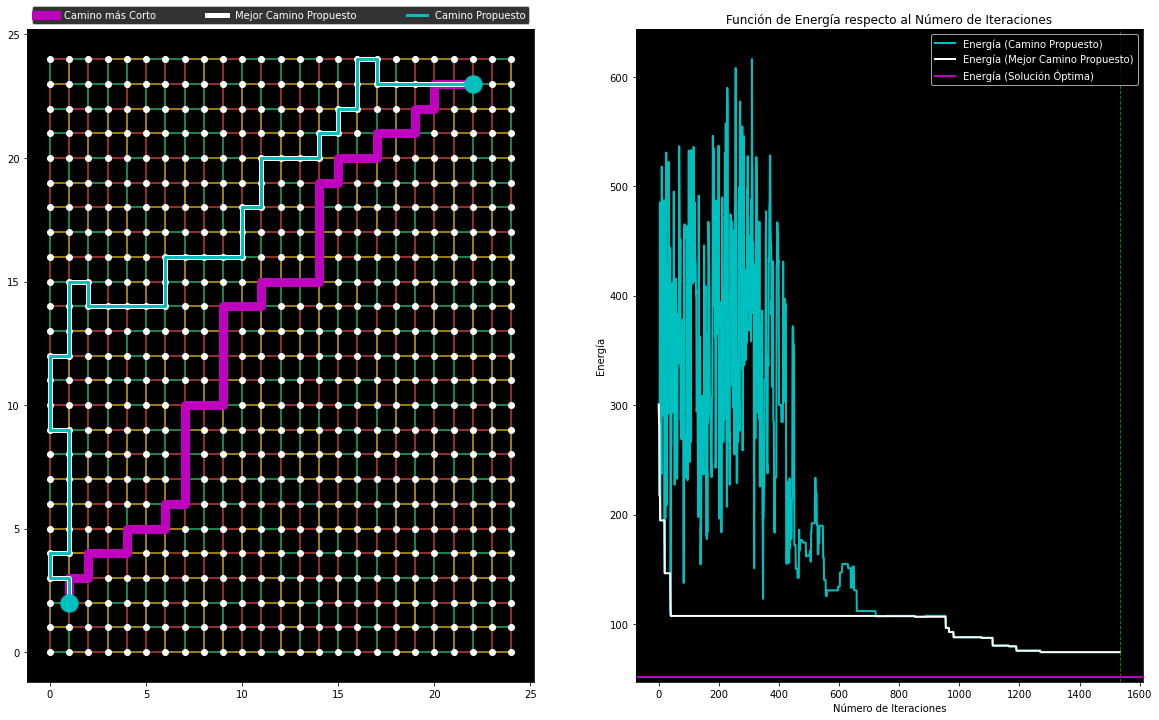

In [10]:
%matplotlib inline

plt.figure(figsize = (20, 12))
plt.subplot(121)
dibujarAristasGrafoPlanoCartesiano(grafo, informacionAristasGrafo, transparencia = 0.85)
plt.plot(listaValoresCoordenadasEjeX, listaValoresCoordenadasEjeY, 'w.', markersize = 12)
plt.plot(listaValoresCoordenadasEjeXCaminoMasCortoOrigenADestino, listaValoresCoordenadasEjeYCaminoMasCortoOrigenADestino, 'm-', label = 'Camino más Corto', linewidth = 9)
plt.plot(listaValoresCoordenadasEjeXMejorCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYMejorCaminoPropuestoOrigenADestino, 'w-', label = 'Mejor Camino Propuesto', linewidth = 5)
plt.plot(listaValoresCoordenadasEjeXCaminoPropuestoOrigenADestino, listaValoresCoordenadasEjeYCaminoPropuestoOrigenADestino, 'c-', label = 'Camino Propuesto', linewidth = 3)
plt.plot([coordenadaXPuntoInicial, coordenadaXPuntoFinal], [coordenadaYPuntoInicial, coordenadaYPuntoFinal], 'c.', markersize = 35)
plt.legend(bbox_to_anchor = (0.0, 1.0, 1.0, 0.0), labelcolor = 'w', loc = 3, ncol = 3, mode = 'expand', borderaxespad = 0.5)
plt.subplot(122)
plt.plot(listaValoresEnergiaSolucionPropuesta, 'c-', label = "Energía (Camino Propuesto)", linewidth = 2)
plt.plot(listaValoresEnergiaMejorSolucionPropuesta, 'w-', label = "Energía (Mejor Camino Propuesto)", linewidth = 2)
plt.axvline(x = numeroIteraciones, color = 'g', linestyle = '--', linewidth = 1)
plt.axhline(y = costoCaminoMasCortoOrigenADestino, color = 'm', linestyle = '-', label = "Energía (Solución Óptima)", linewidth = 2)
plt.title('Función de Energía respecto al Número de Iteraciones')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Energía')
plt.legend(labelcolor = 'w', loc = 'upper right')
plt.pause(tiempoPausaAnimacion)
plt.ioff()
plt.show()

In [11]:
print("La aproximación al camino más corto entre los puntos", printColouredText(str((coordenadaXPuntoInicial, coordenadaYPuntoInicial)), colorTextoVerde), "y", printColouredText(str((coordenadaXPuntoFinal, coordenadaYPuntoFinal)), colorTextoVerde), "es:")
print(printColouredText(textoMejorCaminoPropuestoOrigenADestino, colorTextoRojo))
print("La aproximación al camino más corto entre los puntos", printColouredText(str((coordenadaXPuntoInicial, coordenadaYPuntoInicial)), colorTextoVerde), "y", printColouredText(str((coordenadaXPuntoFinal, coordenadaYPuntoFinal)), colorTextoVerde), "tiene una distancia total de", printColouredText(str(costoMejorCaminoPropuestoOrigenADestino), colorTextoVerde), "y pasa por", printColouredText(str(len(listaNodosMejorCaminoPropuestoOrigenADestino)), colorTextoVerde), "nodos")

endInstantTime = time.time()
fullRunningTime = endInstantTime - startInstantTime
runningTimeInMinutes = int(fullRunningTime / 60)
runningTimeInSeconds = int(fullRunningTime % 60)
print("Tiempo de Ejecución: {} minutos y {} segundos".format(runningTimeInMinutes, runningTimeInSeconds))

La aproximación al camino más corto entre los puntos (1, 2) y (22, 23) es:
(1, 2) -> (1, 3) -> (0, 3) -> (0, 4) -> (1, 4) -> (1, 5) -> (1, 6) -> (1, 7) -> (1, 8) -> (1, 9) -> (0, 9) -> (0, 10) -> (0, 11) -> (0, 12) -> (1, 12) -> (1, 13) -> (1, 14) -> (1, 15) -> (2, 15) -> (2, 14) -> (3, 14) -> (4, 14) -> (5, 14) -> (6, 14) -> (6, 15) -> (6, 16) -> (7, 16) -> (8, 16) -> (9, 16) -> (10, 16) -> (10, 17) -> (10, 18) -> (11, 18) -> (11, 19) -> (11, 20) -> (12, 20) -> (13, 20) -> (14, 20) -> (14, 21) -> (15, 21) -> (15, 22) -> (16, 22) -> (16, 23) -> (16, 24) -> (17, 24) -> (17, 23) -> (18, 23) -> (19, 23) -> (20, 23) -> (21, 23) -> (21, 23)
La aproximación al camino más corto entre los puntos (1, 2) y (22, 23) tiene una distancia total de 74.25999999999998 y pasa por 51 nodos
Tiempo de Ejecución: 12 minutos y 25 segundos
